# Session 03
---

## SQL with Python's SQLite3 

### Translate the Excel scatter plot creation and trendline analysis into a Python and SQLite3 application.


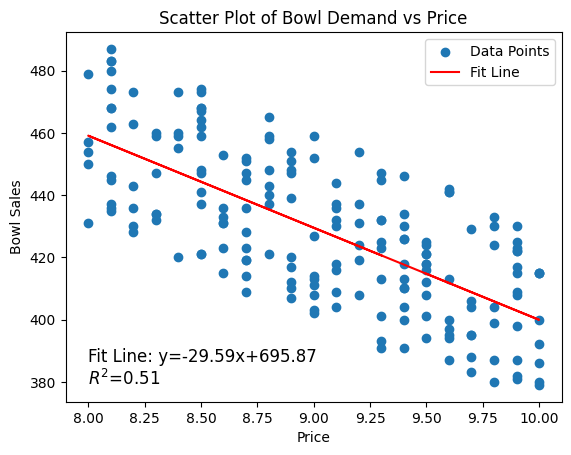

In [17]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# Load data from Excel
# Ensure you adjust the sheet name and column indices as necessary to match your actual data
data = pd.read_excel('data/Maospalace.xlsx', sheet_name='data', usecols='E:F', skiprows=3, nrows=187)

# Renaming columns to match database naming conventions and avoid future errors
data.columns = ['Price', 'Bowl_Sales']

# Connect to SQLite3 database and import data
conn = sqlite3.connect('data/maospalace.db')
# If exists, replace the existing data. Ensure the column names are consistent for SQL operations.
data.to_sql('sales_data', conn, if_exists='replace', index=False)

# Query data from SQLite3 for analysis
df = pd.read_sql_query("""SELECT * FROM sales_data""", conn)

# Plotting
plt.scatter(df['Price'], df['Bowl_Sales'], label='Data Points')
plt.title('Scatter Plot of Bowl Demand vs Price')
plt.xlabel('Price')
plt.ylabel('Bowl Sales')

# Fit a linear regression line
m, b = np.polyfit(df['Price'], df['Bowl_Sales'], 1)
# Adding a linear trendline to the scatter plot
plt.plot(df['Price'], m*df['Price'] + b, color='red', label='Fit Line')  # The label is simplified

# Calculate R-squared value for the linear regression model
r_squared = np.corrcoef(df['Price'], df['Bowl_Sales'])[0, 1]**2

# Position the equation and R-squared value on the plot where they do not overlap with the legend or data points
# Choose a position that is typically empty
plt.text(min(df['Price']), min(df['Bowl_Sales']), f'Fit Line: y={m:.2f}x+{b:.2f}\n$R^2$={r_squared:.2f}', fontsize=12)

# Position the legend on the top right
plt.legend(loc='upper right')

plt.show()


# Close the database connection to free resources
conn.close()



### Understanding and Applying Error Analysis in Marketing Analytics

In [12]:
import pandas as pd
import sqlite3

# Assuming 'data/Maospalace.xlsx' and 'data/maospalace.db' are correctly referenced paths
#data = pd.read_excel('data/Maospalace.xlsx', sheet_name='data', usecols='E:F', skiprows=3, nrows=187)
#data.columns = ['Price', 'Bowl_Sales']

conn = sqlite3.connect('data/maospalace.db')
cursor = conn.cursor()

data.to_sql('sales_data', conn, if_exists='replace', index=False)

cursor.execute('ALTER TABLE sales_data ADD COLUMN Predicted_Sales REAL')
cursor.execute('ALTER TABLE sales_data ADD COLUMN Error REAL')
conn.commit()

# Update Predicted_Sales
cursor.execute('''
    UPDATE sales_data
    SET Predicted_Sales = (-29.595 * Price) + 695.87
''')
conn.commit()

# Now, separately update Error after ensuring Predicted_Sales has values
cursor.execute('''
    UPDATE sales_data
    SET Error = Bowl_Sales - Predicted_Sales
''')
conn.commit()

# Verify the update by fetching a sample
sample_data = cursor.execute('SELECT Price, Bowl_Sales, Predicted_Sales, Error FROM sales_data LIMIT 5').fetchall()
print("Sample Data (Price, Bowl_Sales, Predicted_Sales, Error):")
for row in sample_data:
    print(row)

# Attempt to fetch and print the sum of errors again
sum_of_errors_query = cursor.execute('SELECT SUM(Error) FROM sales_data').fetchone()
if sum_of_errors_query and sum_of_errors_query[0] is not None:
    print(f"Sum of Errors: {sum_of_errors_query[0]:.2f}")
else:
    print("Sum of Errors calculation failed, please check the data and queries.")

conn.close()


Sample Data (Price, Bowl_Sales, Predicted_Sales, Error):
(9.3, 391, 420.6365, -29.636500000000012)
(9.1, 418, 426.55550000000005, -8.555500000000052)
(8.5, 459, 444.3125, 14.6875)
(9.5, 424, 414.71750000000003, 9.28249999999997)
(8.7, 447, 438.3935, 8.606499999999983)
Sum of Errors: 1.54


In [18]:
import pandas as pd
import sqlite3
import numpy as np

# Reconnect to the SQLite database
conn = sqlite3.connect('data/maospalace.db')
cursor = conn.cursor()

# Calculate Slope and Intercept using SQL operations
# Since the direct calculation of slope and intercept might not be straightforward with SQLite queries,
# we retrieve the necessary data and perform calculations in Python.

# Fetch price and sales data
data_query = cursor.execute('SELECT Price, Bowl_Sales FROM sales_data').fetchall()
data_df = pd.DataFrame(data_query, columns=['Price', 'Bowl_Sales'])

# Calculate Slope and Intercept in Python
X = data_df['Price']
y = data_df['Bowl_Sales']
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calculating slope (b1) and intercept (b0)
b1 = sum((X - X_mean) * (y - y_mean)) / sum((X - X_mean)**2)
b0 = y_mean - b1 * X_mean

# Update the database with Slope and Intercept (Optional, as we are doing calculations in Python)
# This step is skipped as it's more relevant to calculate and use these values in Python directly.

# Calculate R-squared value
y_pred = b1 * X + b0
ss_tot = sum((y - y_mean)**2)
ss_res = sum((y - y_pred)**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"Slope: {b1:.2f}")
print(f"Intercept: {b0:.2f}")
print(f"R-squared: {r_squared:.2f}")

conn.close()


Slope: -29.59
Intercept: 695.87
R-squared: 0.51


### Title: Decoding Marketing Dynamics: The Power of Correlation Analysis

#### Part A - Slide Contents and Brief Discussion:
- **Correlation Analysis in Marketing**: Explores the concept of correlation as a measure of the linear relationship between two variables, emphasizing its role in understanding market dynamics without implying causation.
- **Practical Insight**: Demonstrates how correlation analysis can reveal patterns and relationships among multiple marketing variables, aiding in strategy development and optimization.

#### Part B1 - MS Excel Practice/Exercise/Steps:
Not Applicable

#### Part B2 - Python+SQLite3 Practice:
- **Objective**: To demonstrate how to compute and interpret correlation coefficients between pairs of variables using Python, highlighting their relevance in marketing analytics.


In [19]:
import pandas as pd
import sqlite3

# Assuming 'data/marketing_data.db' is the SQLite database containing the relevant marketing data
conn = sqlite3.connect('data/maospalace.db')
cursor = conn.cursor()

# Calculating Correlation Coefficients
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Interpretation Example
# Assuming 'Price' and 'Bowl_Sales' are columns in 'sales_data'
price_sales_corr = df['Price'].corr(df['Bowl_Sales'])
print(f"\nCorrelation between Price and Bowl Sales: {price_sales_corr:.2f}")

# Close the database connection
conn.close()


Correlation Matrix:
               Price  Bowl_Sales
Price       1.000000   -0.711862
Bowl_Sales -0.711862    1.000000

Correlation between Price and Bowl Sales: -0.71


### Title: Simplifying Customer Lifetime Value Calculation

#### Part A - Slide Contents and Brief Discussion:
- **Efficient Customer Value Estimation**: Introduces an explicit formula to calculate the lifetime value of a customer, simplifying complex evaluations into a direct multiplier approach. This method underscores the critical role of customer retention and discount rates in shaping the overall value a customer brings to a business.
- **Case Study Application**: Highlights the practical utility of this formula through an example involving cable TV subscribers, illustrating how the annual retention and discount rates influence customer valuation.

#### Objective: To demonstrate the calculation of customer value multiplier using Python, applying the explicit formula provided.

In [20]:
# Define the annual retention rate and the annual discount rate
retention_rate = 0.8  # 80%
discount_rate = 0.1   # 10%

# Applying the explicit formula for the multiplier
multiplier = (1 + discount_rate) / (1 + discount_rate - retention_rate)

# Assuming an annual profit margin of $300 per customer
annual_profit_margin = 300

# Calculate the customer's value
customer_value = annual_profit_margin * multiplier

print(f"Multiplier: {multiplier:.2f}")
print(f"Customer Value: ${customer_value:.2f}")


Multiplier: 3.67
Customer Value: $1100.00


### Title: Optimizing Customer Value with Dynamic Margin Analysis

#### Part A - Slide Contents and Brief Discussion:
- **Dynamic Margin Analysis in Customer Value Calculation**: Highlights the significance of considering varying customer margins over time in accurately estimating customer lifetime value. This approach takes into account the changing profitability of customers as their relationship with the company matures.
- **Insights for Strategic Marketing**: Demonstrates the necessity of adjusting for margin variations and retention rate changes, providing a more nuanced understanding of customer value that supports targeted retention strategies and marketing investments.


#### Objective: To illustrate the computation of customer value with varying margins over time using Python, factoring in changes in retention rates and margin growth.

In [21]:
import numpy as np

# Define parameters
year_1_margin = 1  # Initial margin per customer
steady_state_margin = 1.5  # Steady state margin per customer
T_star = 3  # Periods until margin is halfway to steady state
k = -np.log(0.5) / T_star  # Decay constant

# Function to calculate year n margin
def year_n_margin(n, year_1_margin=year_1_margin, steady_state_margin=steady_state_margin, k=k):
    return year_1_margin + (steady_state_margin - year_1_margin) * (1 - np.exp(-k * (n - 1)))

# Example: Calculate margin for year 1 to 5
for n in range(1, 6):
    print(f"Year {n} margin: {year_n_margin(n):.2f}")


Year 1 margin: 1.00
Year 2 margin: 1.10
Year 3 margin: 1.19
Year 4 margin: 1.25
Year 5 margin: 1.30


### Title: The Strategic Impact of Exclusive Content: DIRECTV's Investment in "Friday Night Lights"

#### Part A - Slide Contents and Brief Discussion:
- **Case Study: DIRECTV & "Friday Night Lights"**: Explores DIRECTV's decision to co-finance the continuation of "Friday Night Lights" (FNL), a critically acclaimed but low-rated TV show. This move was part of a broader strategy to differentiate DIRECTV's offerings with exclusive entertainment content, akin to its sports programming exclusivity.
- **Strategic Analysis**: Discusses the financial rationale behind DIRECTV's investment, estimating the number of new subscribers needed to offset production costs based on customer lifetime value calculations. This real-world scenario underscores the importance of leveraging exclusive content to enhance subscriber base and profitability.


#### Objective: To demonstrate the calculation of the customer lifetime value (CLTV) and the number of new subscribers needed to justify the cost of saving "Friday Night Lights" using Python.

Insight: This Python script provides a clear calculation of the financial implications of DIRECTV's decision to invest in "Friday Night Lights". By understanding the CLTV and the required number of new subscribers, businesses can make informed decisions about investments in exclusive content.


In [22]:
# Assumptions based on DIRECTV's case
monthly_churn_rate = 0.0151
annual_profit_per_subscriber = 255  # After acquisition costs
annual_discount_rate = 0.1
annual_retention_rate = (1 - monthly_churn_rate) ** 12
production_costs = 13000000  # $13 million per year
multiplier = 3.6  # Based on the given annual discount and retention rates

# Calculate Customer Lifetime Value (CLTV)
cltv = multiplier * annual_profit_per_subscriber

# Determine the number of new subscribers needed
new_subscribers_needed = production_costs / cltv

print(f"Customer Lifetime Value: ${cltv:.2f}")
print(f"New Subscribers Needed: {new_subscribers_needed:,.0f}")


Customer Lifetime Value: $918.00
New Subscribers Needed: 14,161


In [23]:
import sqlite3

# Connect to SQLite database (it's created if it doesn't exist)
conn = sqlite3.connect('sales.db')
cursor = conn.cursor()

# Create tables with various constraints and data types
cursor.execute('''
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email_address TEXT UNIQUE,
    number_of_complaints INTEGER DEFAULT 0,
    gender TEXT CHECK(gender IN ('M', 'F')) NOT NULL
)''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    purchase_number INTEGER PRIMARY KEY AUTOINCREMENT,
    date_of_purchase TEXT NOT NULL,
    customer_id INTEGER,
    item_code TEXT NOT NULL,
    FOREIGN KEY(customer_id) REFERENCES customers(customer_id) ON DELETE CASCADE
)''')

# Insert data into tables
cursor.execute('''
INSERT INTO customers (first_name, last_name, email_address, number_of_complaints, gender)
VALUES ('John', 'Doe', 'john.doe@example.com', 0, 'M')
''')

# Query data from tables
cursor.execute('SELECT * FROM customers')
print(cursor.fetchall())

# Updating and deleting records
cursor.execute('''
UPDATE customers SET first_name = 'Jane', gender = 'F' WHERE customer_id = 1
''')

cursor.execute('DELETE FROM customers WHERE customer_id = 1')

# Using JOIN to combine rows from two or more tables
cursor.execute('''
SELECT sales.purchase_number, customers.first_name
FROM sales
JOIN customers ON sales.customer_id = customers.customer_id
''')

# Show the joined result
print(cursor.fetchall())

# Commit changes and close the connection
conn.commit()
conn.close()


[(1, 'John', 'Doe', 'john.doe@example.com', 0, 'M')]
[]
